# CS 123B Final Project: Heart Disease Detection
##### Author: Amara Del Prato
##### Description: Trains a logistic regression model and random forest model in python using a dataset of subjects with and without heart disease in order to predict occurance of heart disease. Evaluates effectiveness of these models using a classification report and confusion matrices.

In [1]:
pip install ucimlrepo # runs fine despite red lines

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

In [3]:
# fetch dataset
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)

In [4]:
columns = [
    "age", "sex", "chest pain", "blood pressure", "cholesterol", "fasting blood sugar", "ECG",
    "max heart rate", "exercise-induced angina", "ST depression", "slope", "# of blood vessels colored", "thalassemia"
]

In [5]:
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)
# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [7]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [8]:
# Missing Data Handling (using median to eliminate outliers)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X)
X = imputer.transform(X)

In [9]:
# Transform y to binary classification (all values >= 1 indicate heart disease)
y = y.iloc[:, 0]
y = y.apply(lambda x: 1 if x > 0 else 0)
y = y.values.ravel()

In [10]:
print(X.shape)

(303, 13)


In [11]:
print(y)

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 0]


In [12]:
# Splitting data into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale data using Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [14]:
# Using logistic regression, since outcome is binary
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [15]:
print("=== Logistic Regression Classsification Report ===\n")
print(classification_report(y_test, y_pred))

=== Logistic Regression Classsification Report ===

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



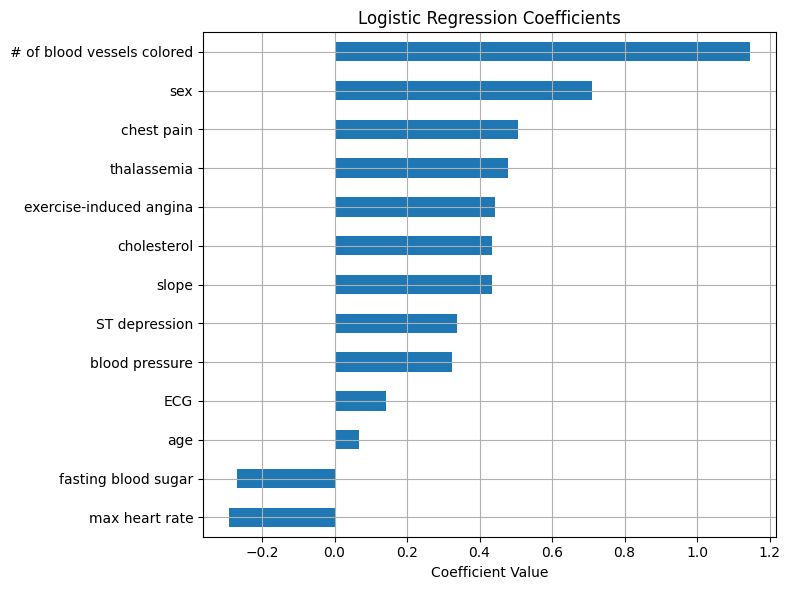

In [16]:
# Coefficients table showing inportance of different features
coefs = pd.Series(lr.coef_[0], index=columns)
coefs.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.grid()
plt.tight_layout()
plt.show()

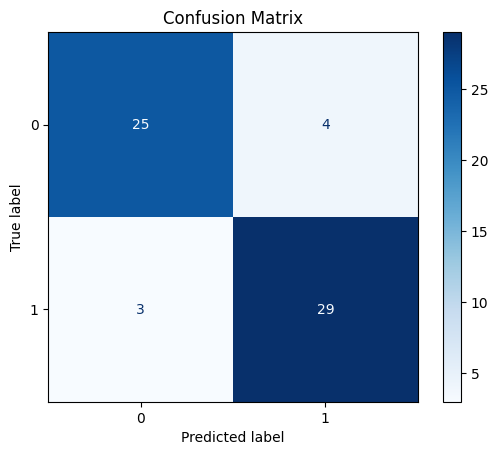

In [17]:
# LR confusion matrix table
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

## Random Forest

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [19]:
print("=== Random Forest Classsification Report ===\n")
print(classification_report(y_test, y_pred))

=== Random Forest Classsification Report ===

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



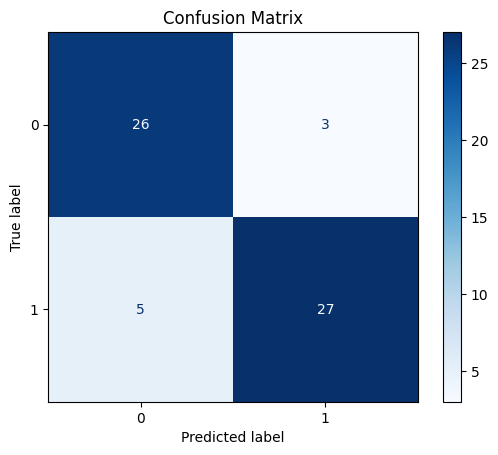

In [20]:
# RF confusion matrix table
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

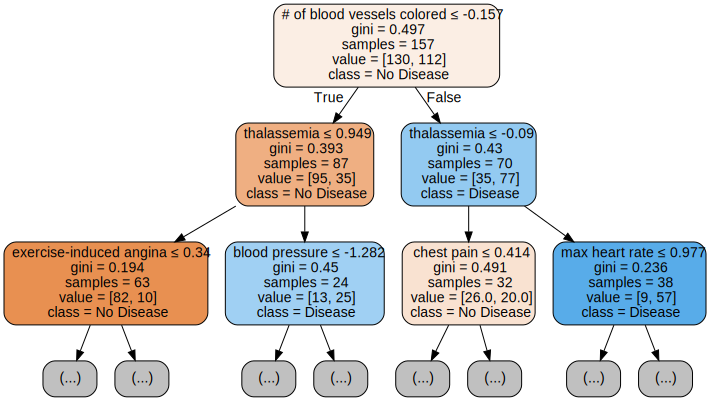

In [21]:
# Decision tree for Class 0 (No disease)
estimator = rf.estimators_[0]

dot_data = export_graphviz(estimator,
                           out_file=None,
                           feature_names=columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=2)
graph = graphviz.Source(dot_data)
display(graph)

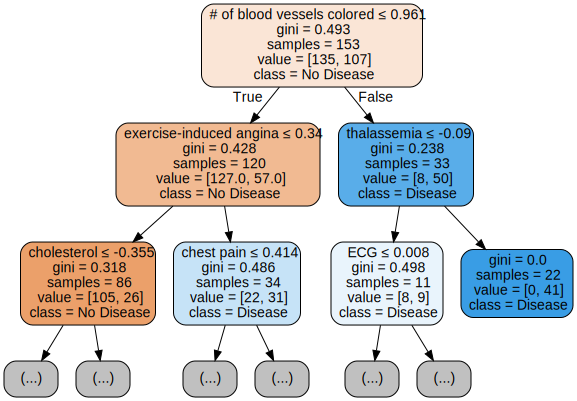

In [22]:
# Decision tree for Class 1 (Disease)
estimator = rf.estimators_[1]

dot_data = export_graphviz(estimator,
                           out_file=None,
                           feature_names=columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=2)
graph = graphviz.Source(dot_data)
display(graph)